In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
df=pd.read_csv("./delhi_aqi.csv")

In [8]:
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


The dataset is having 8 columns consisting of the main air pollutants and the data collected starts from 25th November 2020 to Jan 24th 2023.

Total of 18776 rows and 8 columns.

There are no null values in the data.

#### Statistical Analysis

In [10]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


From the statistical analysis it can be observed that all the parameters are high level of outlier values.

In [11]:
df.rename(columns = {'co':'Carbon Monoxide,μg/m3','no':'Nitrogen Oxide,μg/m3','no2':'Nitrogen Dioxide,μg/m3','o3':'Ozone,μg/m3',
          'so2':'Sulphur Dioxide,μg/m3','pm2_5':'PM2.5,μg/m3','pm10':'PM10,μg/m3','nh3':'Ammonia,μg/m3'},inplace = True)

In [12]:
df.head(5)

,date,"Carbon Monoxide,μg/m3","Nitrogen Oxide,μg/m3","Nitrogen Dioxide,μg/m3","Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3"
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [13]:
df.isnull().sum()

date                      0
Carbon Monoxide,μg/m3     0
Nitrogen Oxide,μg/m3      0
Nitrogen Dioxide,μg/m3    0
Ozone,μg/m3               0
Sulphur Dioxide,μg/m3     0
PM2.5,μg/m3               0
PM10,μg/m3                0
Ammonia,μg/m3             0
dtype: int64

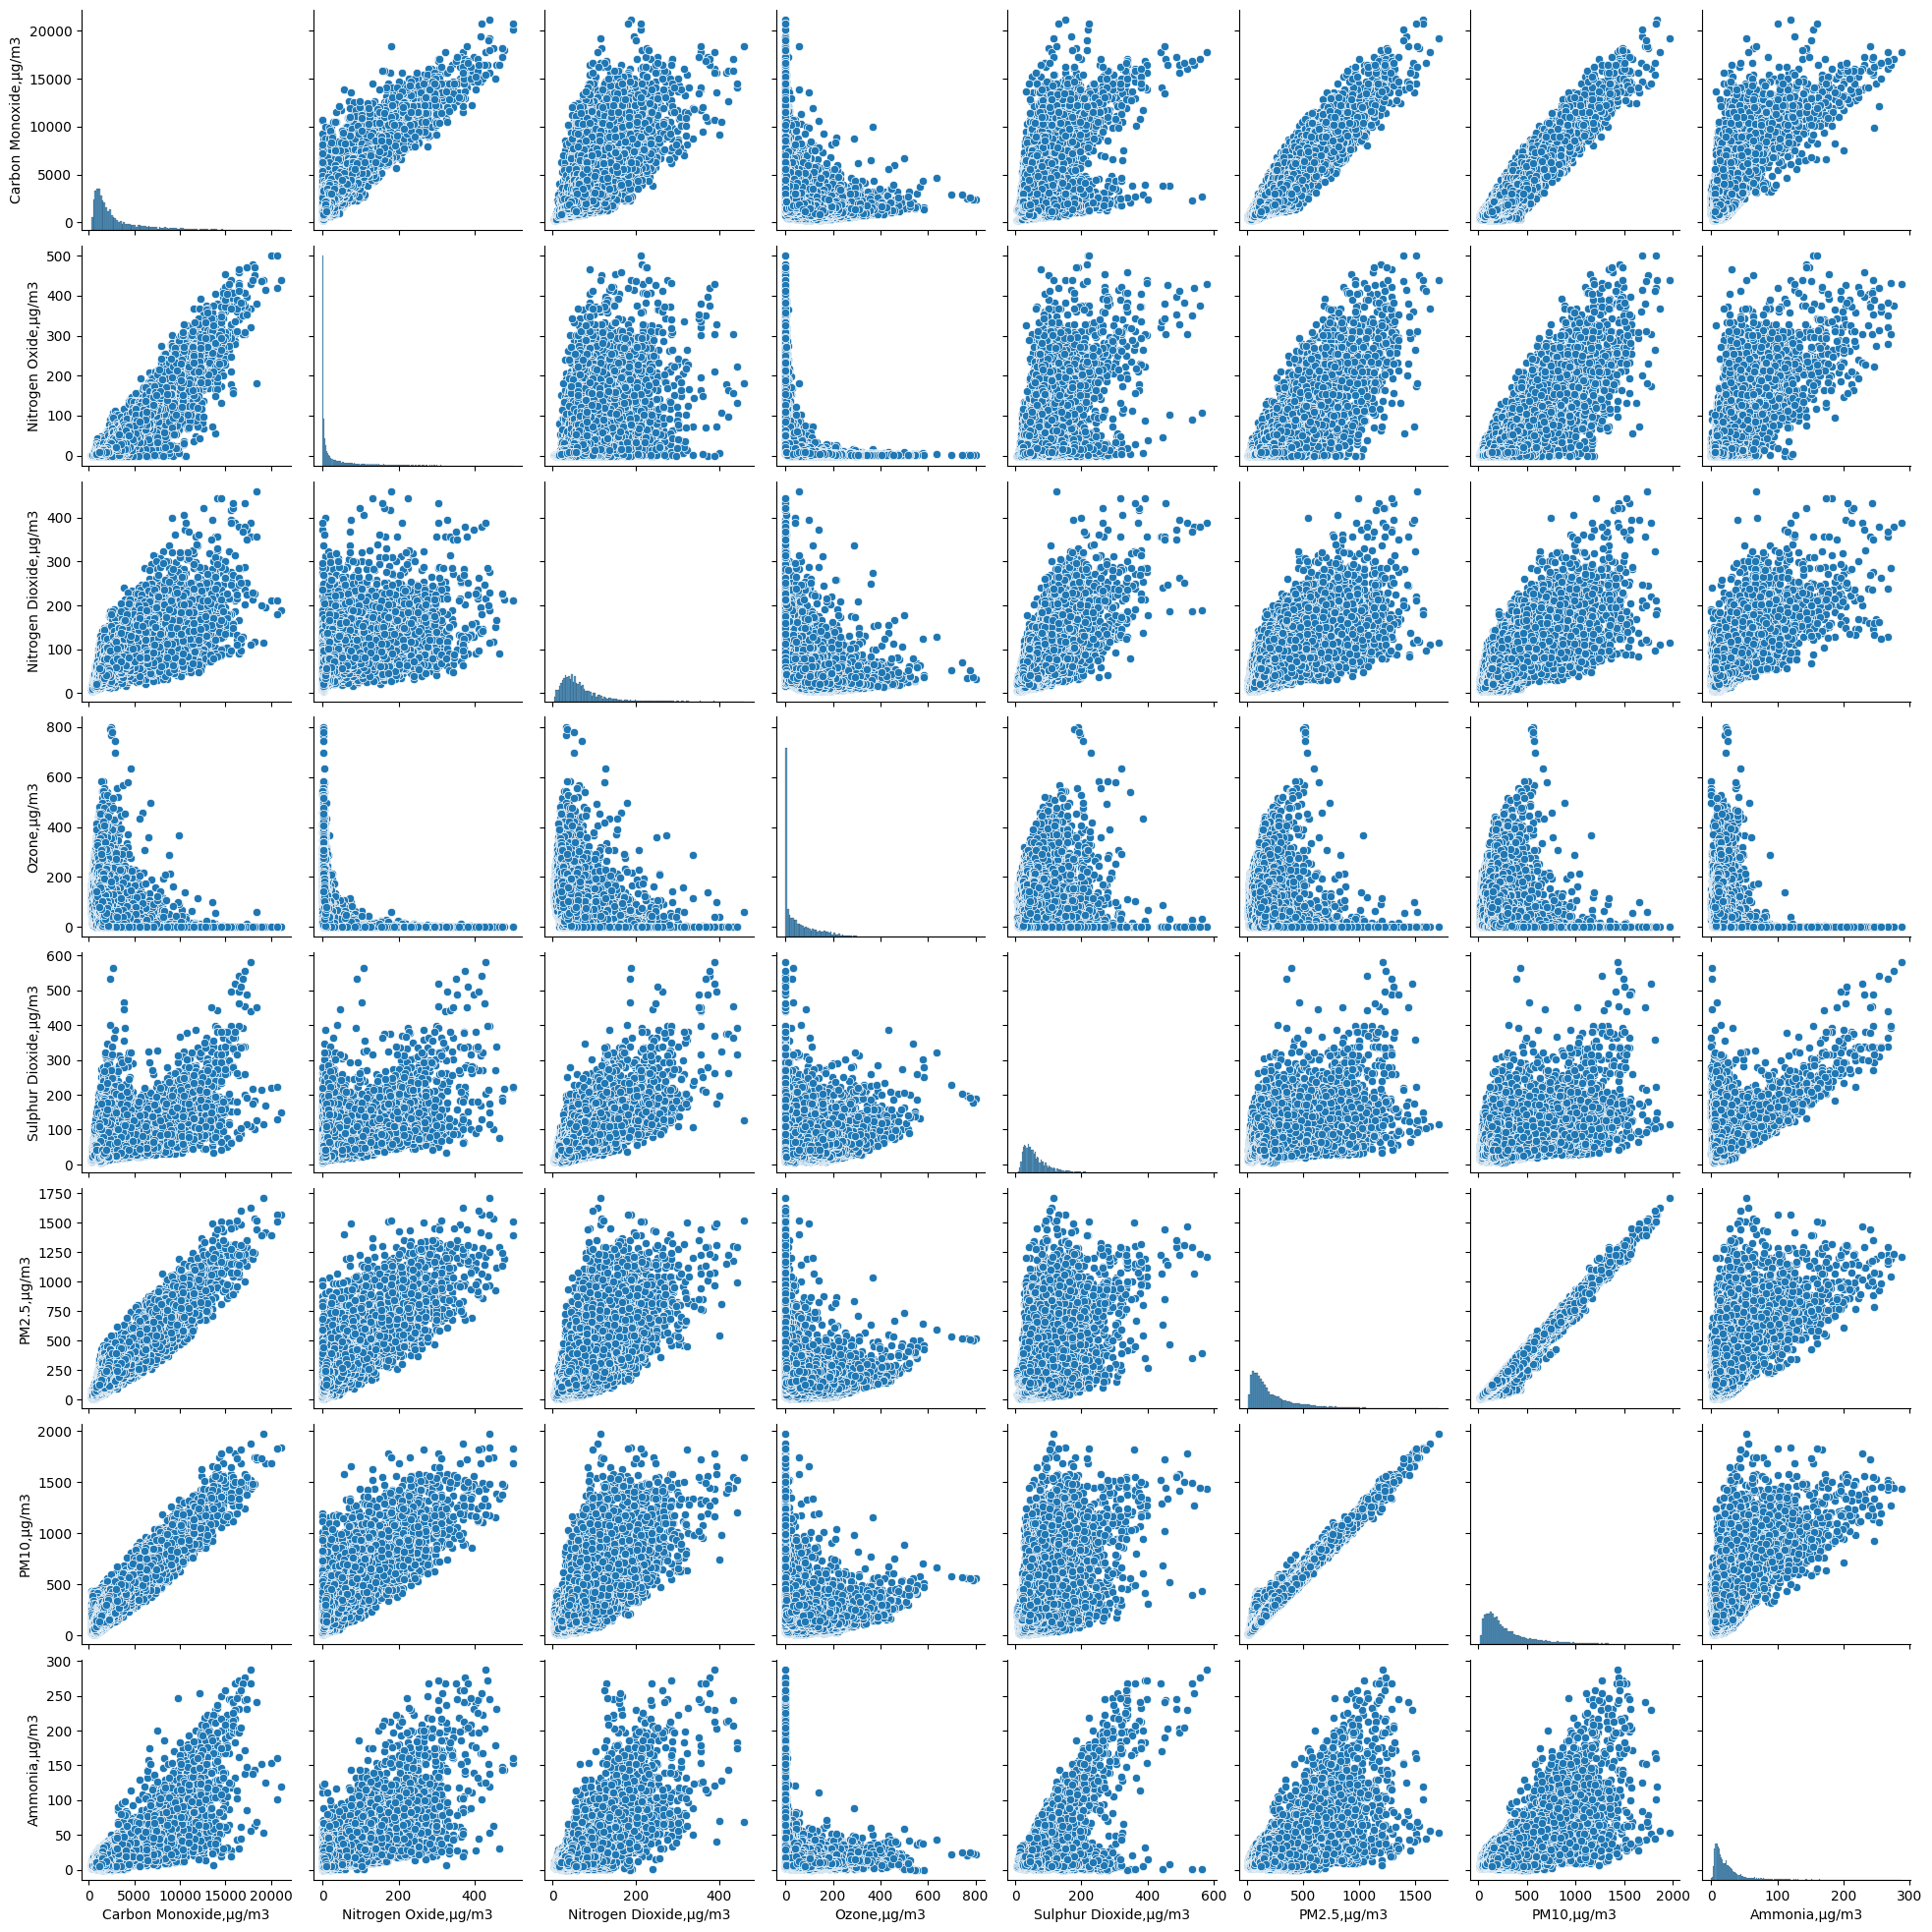

In [14]:
sns.pairplot(df,hue = None,palette="cubehelix")

From the pairplot it can be observed that all the parameters are having almost linear relationship with each other

#### Splitting the date to year,month,week,dayname and hour

In [15]:
df['date'] = pd.to_datetime(df['date'])
import datetime as dt
df['year'] = df['date'].dt.year
df['month']=df['date'].dt.month
df['week'] = df['date'].dt.week
df['Day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].apply(lambda x : int(x.hour))
df['day'] = df['date'].dt.day
df.head(5)

AttributeError: 'DatetimeProperties' object has no attribute 'week'

In [ ]:
df1 = df.drop(['date'],axis = 1)

In [ ]:
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
df1['seasons']=df1['month'].map(seasons)
df1.head()

### Pollutants Concentration in Different Years for Different Seasons

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Carbon Monoxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Carbon Monoxide Level in different Years for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Oxide Level in different Years for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Dioxide Level in different Years for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM2.5,μg/m3", hue="seasons",palette="Set2")
plt.title("PM2.5 Level in different Years for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM10,μg/m3", hue="seasons",palette="Set2")
plt.title("PM10 Level in different Years for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Ammonia,μg/m3", hue="seasons",palette="Set2")
plt.title("Ammonia Level in different Years for Different Seasons")
plt.show()

 * It can be observed that the concentration of the pollutants are high in the winter and almost high in autumn seasons.Autumn season is almost offset of the rainy season and onset of winter season.As the cold air is denser than the warm air, so the cold air will trap the particles but it will not carry the pollutants away.So the pollutants will be the air which causes the increase of the pollutants in winter season and autumn season.PM10 and PM2.5 values are higher in the winter seasons.
 
 
 * There are many outlier values in all parameters and the outlier values are very high than other values.This shows the pollutant concentrations are very high than the normal range.The higher values are in the year 2021 and 2022.

### Pollutants Concentration in Different Hours of the Day for Different Seasons

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Carbon Monoxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Carbon Monoxide Level in different Hours of the Day")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Dioxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Dioxide Level in different Hours of the Day")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Oxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Oxide Level in different Hours of the Day")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM2.5,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM2.5 Level in different Hours of the Day")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM10,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM10 Level in different Hours of the Day")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Ammonia,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Ammonia Level in different Hours of the Day")
plt.show()

All the parameters are showing high concentration after the peak hours and all are following the same trend.The concentrations are very high after 1 pm till 7pm.

### Pollutants Concentration in Different Days for Different Seasons

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Carbon Monoxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Carbon Monoxide Level in different days for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,7))
sns.violinplot(data=df1, x="Day_name", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Oxide Level in different days for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Dioxide Level in different days for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="PM10,μg/m3", hue="seasons",palette="rocket")
plt.title("PM10 Level in different days for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="PM2.5,μg/m3", hue="seasons",palette="rocket")
plt.title("PM2.5 Level in different days for Different Seasons")
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Ammonia,μg/m3", hue="seasons",palette="rocket")
plt.title("Ammonia Level in different days for Different Seasons")
plt.show()

The concentration of the pollutants are high during the autumn and winter seasons and mainly on fridays and Mondays the concentrations are higher compared to other days.

In [ ]:
df1['date'] = pd.to_datetime(df['date']).dt.date
df1['time'] = pd.to_datetime(df['date']).dt.time

In [ ]:
AQIData = df1.groupby(['date'])[['Carbon Monoxide,μg/m3','Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3','Ozone,μg/m3','Sulphur Dioxide,μg/m3','PM2.5,μg/m3','PM10,μg/m3','Ammonia,μg/m3']].mean()
AQIData['Carbon Monoxide,mg/m3'] = (AQIData['Carbon Monoxide,μg/m3']/1000).round(2)
AQIData= AQIData.drop(['Carbon Monoxide,μg/m3'],axis =1)
AQIData['NOx,μg/m3'] = AQIData['Nitrogen Oxide,μg/m3']+AQIData['Nitrogen Dioxide,μg/m3']
AQIData= AQIData.drop(['Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3'],axis =1)

In [ ]:
AQIData.head(5)

In [ ]:
def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

AQIData["PM2.5_SubIndex"] = AQIData["PM2.5,μg/m3"].apply(lambda x: PM25_subindex(x))

def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

AQIData["PM10_SubIndex"] = AQIData["PM10,μg/m3"].apply(lambda x: PM10_subindex(x))


def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

AQIData["SO2_SubIndex"] = AQIData["Sulphur Dioxide,μg/m3"].apply(lambda x: SO2_subindex(x))


def NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

AQIData["NOx_SubIndex"] = AQIData["NOx,μg/m3"].apply(lambda x: NOx_subindex(x))

def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

AQIData["CO_SubIndex"] = AQIData["Carbon Monoxide,mg/m3"].apply(lambda x: CO_subindex(x))


def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0
    
def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

AQIData["NH3_SubIndex"] = AQIData["Ammonia,μg/m3"].apply(lambda x: NH3_subindex(x))    

AQIData["O3_SubIndex"] = AQIData["Ozone,μg/m3"].apply(lambda x: O3_subindex(x))


AQIData["Checks"] = (AQIData["PM2.5_SubIndex"] > 0).astype(int) + \
                (AQIData["PM10_SubIndex"] > 0).astype(int) + \
                (AQIData["SO2_SubIndex"] > 0).astype(int) + \
                (AQIData["NOx_SubIndex"] > 0).astype(int) + \
                (AQIData["NH3_SubIndex"] > 0).astype(int) + \
                (AQIData["CO_SubIndex"] > 0).astype(int) + \
                (AQIData["O3_SubIndex"] > 0).astype(int)

AQIData["AQI_calculated"] = round(AQIData[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))


AQIData.head(5)


In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
AQIData["AQI_bucket_calculated"] = AQIData["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
AQIData = AQIData.reset_index()
AQIData.head(5)

In [ ]:
AQIData['date'] = pd.to_datetime(AQIData['date'])
AQIData['year'] = AQIData['date'].dt.year
fig, ax= plt.subplots(figsize=(12,6))
sns.barplot(data=AQIData, x="year", y="AQI_calculated",hue ='AQI_bucket_calculated')

The AQI was severe during the year 2021

In [ ]:
AQIData1 = AQIData.drop(['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex','CO_SubIndex','O3_SubIndex','Checks','year'],axis =1)

In [ ]:
AQIData2 = AQIData1.iloc[:,1:9]
corr_matrix = AQIData2.corr()
fig, ax= plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
AQIData2.head()

In [ ]:
AQIData2.describe()

In [ ]:
plt.figure(figsize=(20,8))
sns.pairplot(AQIData1,hue = 'AQI_bucket_calculated')

In [ ]:
x = AQIData2.drop(['AQI_calculated'],axis =1)
y = AQIData2['AQI_calculated']

### Classifying into Categories based on CPCB

In [ ]:
import pandas as pd

# Sample DataFrame creation (replace this with your loaded data)
# AQIData2 = pd.read_csv("your_file.csv")  # Uncomment this line if loading from CSV

# Function to assign AQI category based on the provided ranges
def assign_aqi_category(aqi_value):
    if 0 <= aqi_value <= 50:
        return "Good"
    elif 51 <= aqi_value <= 100:
        return "Satisfactory"
    elif 101 <= aqi_value <= 200:
        return "Moderate"
    elif 201 <= aqi_value <= 300:
        return "Poor"
    elif 301 <= aqi_value <= 400:
        return "Very Poor"
    elif aqi_value >= 401:  # Anything above 401 is Severe
        return "Severe"

# Apply the function to the AQI column
AQIData2['Category'] = AQIData2['AQI_calculated'].apply(assign_aqi_category)

# Display the updated DataFrame
print(AQIData2.head())

# Optionally save to a new CSV
AQIData2.to_csv("AQI_with_Category.csv", index=False)
